In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 

In [2]:
energy_df = pd.read_csv("6 train.csv")
energy_df['Time']

0          2015-01-01 00:00:00
1          2015-01-01 00:00:00
2          2015-01-01 01:00:00
3          2015-01-01 01:00:00
4          2015-01-01 02:00:00
                  ...         
1047609    2017-12-31 21:00:00
1047610    2017-12-31 22:00:00
1047611    2017-12-31 22:00:00
1047612    2017-12-31 23:00:00
1047613    2017-12-31 23:00:00
Name: Time, Length: 1047614, dtype: object

In [176]:
def visual_building(id):
    building = energy_df[energy_df['BuildingID'] == id]
    building_q = building[building['Type'] == 'Q']
    building_q = building_q.reset_index(drop=True)
    building_w = building[building['Type'] == 'W']
    building_w = building_w.reset_index(drop=True)
#     print(building_w)
#     print(len(building_w))
    building_q['Record_Q'] = building_q['Record']
    building_q['Record_W'] = building_w['Record']
    building = building_q.drop(['Type', 'Record'], axis=1)
#     plt.plot(building['Record_Q'])
#     plt.plot(building['Record_W'])
    
    return building

In [177]:
building_df

Time  BuildingID  Record_Q  Record_W
0      2015-01-01 00:00:00           0    222.00    203.15
1      2015-01-01 01:00:00           0    236.00    205.14
2      2015-01-01 02:00:00           0    222.00    179.15
3      2015-01-01 03:00:00           0    198.00    173.16
4      2015-01-01 04:00:00           0    237.00    194.17
...                    ...         ...       ...       ...
26299  2017-12-31 19:00:00           0    186.00    217.72
26300  2017-12-31 20:00:00           0    185.00    227.37
26301  2017-12-31 21:00:00           0    190.00    236.06
26302  2017-12-31 22:00:00           0    191.00    226.09
26303  2017-12-31 23:00:00           0    174.82    229.97

[26304 rows x 4 columns]

In [178]:
import numpy as np

def anomaly_detection(df):
    s = df['Record_W']
    df['isOutlier'] = s < 0
    df_out = df[df['isOutlier'] == True]
    s[s<0] = np.nan
    df.fillna(method='ffill')
    df['Record_W'] = s
    print(df.iloc[405:500])
    

count    26304.000000
mean       504.462087
std        292.073545
min        119.800000
25%        269.740000
50%        383.650000
75%        753.210000
max       1100.000000
Name: Record_Q, dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


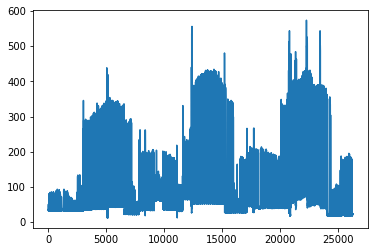

In [262]:
# building 0 max, building 11 > 50000, 13 too small, 
# Q: building 0: 1100, building 1: 1000, 5: <50, 6: too small, 10: < 50, 11: wrong, 19: different pattern
building_df = visual_building(1)
building_df[building_df[['Record_W']] < 0] = np.nan
building_df[building_df[['Record_Q']] > 1100] = np.nan

building_df = building_df.fillna(method='ffill')
# building_df.iloc[building_df['Record_W'].idxmax()]["Record_W"]

building_df['Record_W'][building_df['Record_W'].idxmax()] = building_df['Record_W'][building_df['Record_W'].idxmax() - 1]
# building_df[building_df['Record_W'] > 50000].index
plt.plot(building_df['Record_W'])
print(building_df['Record_Q'].describe())
# building_df.iloc[405:410]
# building_df.iloc[4950:5000]

In [181]:
def visual_weather():
    weather_df1 = pd.read_excel(open('weather/shanghai weather_' + str(2015) + '.xlsx', 'rb'), sheet_name="Sheet2", 
                              names=["time", "temp", "point_temp", "humidity", "pa", "wind speed"])
    weather_df2 = pd.read_excel(open('weather/shanghai weather_' + str(2016) + '.xlsx', 'rb'), sheet_name="Sheet2", 
                              names=["time", "temp", "point_temp", "humidity", "pa", "wind speed"])
    weather_df3 = pd.read_excel(open('weather/shanghai weather_' + str(2017) + '.xlsx', 'rb'), sheet_name="Sheet2", 
                              names=["time", "temp", "point_temp", "humidity", "pa", "wind speed"])
    print(len(weather_df1), len(weather_df2), len(weather_df3))
    weather_df = pd.concat([weather_df1, weather_df2[:-1], weather_df3])
    print(len(weather_df))
    plt.plot(weather_df['wind speed'][:1000])
    return weather_df

8760 8761 8760
26280


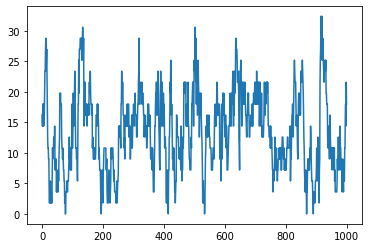

In [97]:
weather_df = visual_weather()

In [93]:
weather_df.iloc[0]

time          2015-01-01 00:00:00
temp                          1.5
point_temp                    -12
humidity                     36.5
pa                           1033
wind speed                   16.2
Name: 0, dtype: object

In [2]:
def visual_daily_energy(df_name):
    df = pd.read_csv('Daily-record/' + df_name)
    plt.plot(df['avg'][:365])
    plt.plot(df['avg'][365:731])    
    plt.plot(df['avg'][731:])    

In [3]:
def visual_daily_weather(df_name):
    df = pd.read_csv('Daily-weather/' + df_name)
    plt.plot(df['tem_avg'])    
    plt.plot(df['tem_dew_avg'])
    plt.plot(df['rh_avg'])
    plt.plot(df['pressure_avg'])    

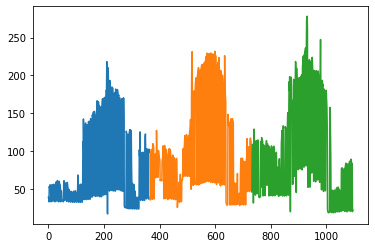

In [33]:
visual_daily_energy('ID-1-W.csv')

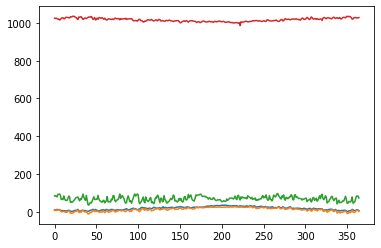

In [38]:
visual_daily_weather('weather-2017.csv')

In [2]:
df = pd.read_csv("all_buildings.csv")

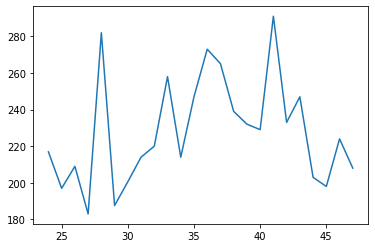

In [4]:
plt.plot(df["Record_Q"][24:48])

In [22]:
def visual_daily_trend(building, days):
    df = pd.read_csv("all_buildings.csv")
    bd = df[df["BuildingID"] == building]
    for i in range(days):
        plt.plot(bd["Record_Q"][i*24:(i+1)*24].values)

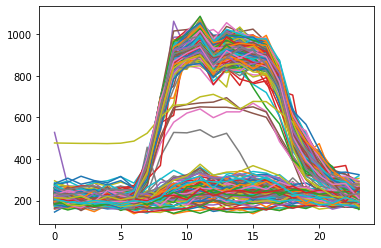

In [25]:
visual_daily_trend(0, 360)

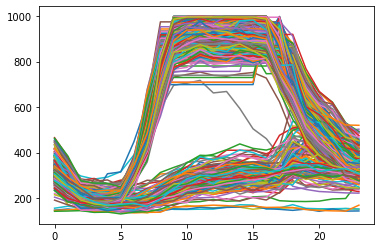

In [26]:
visual_daily_trend(1, 360)

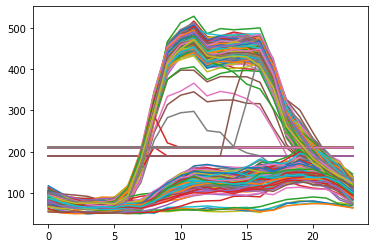

In [27]:
visual_daily_trend(2, 360)

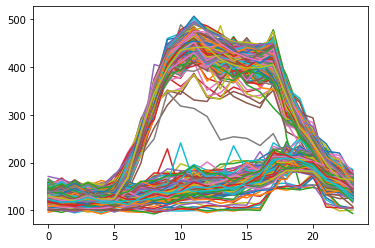

In [28]:
visual_daily_trend(3, 360)

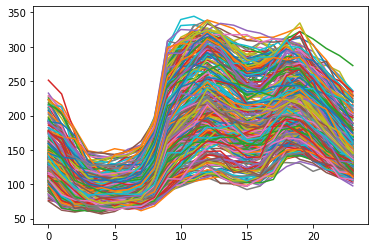

In [29]:
visual_daily_trend(4, 360)

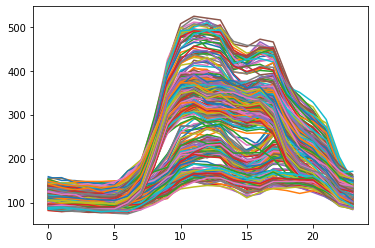

In [30]:
visual_daily_trend(5, 360)

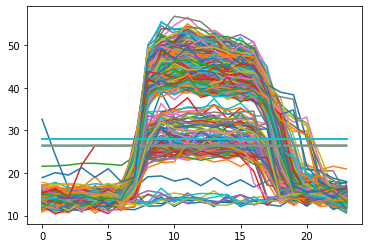

In [31]:
visual_daily_trend(6, 360)

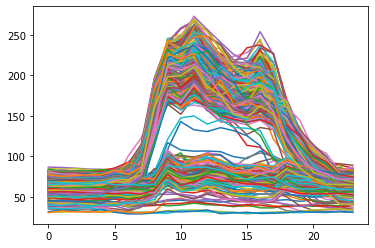

In [32]:
visual_daily_trend(7, 360)

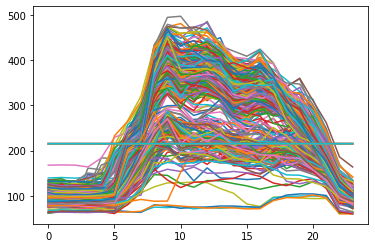

In [33]:
visual_daily_trend(8, 360)

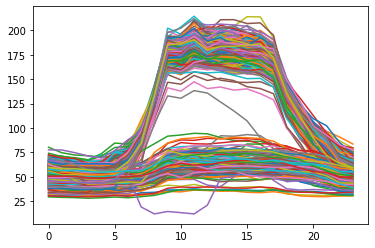

In [34]:
visual_daily_trend(9, 360)

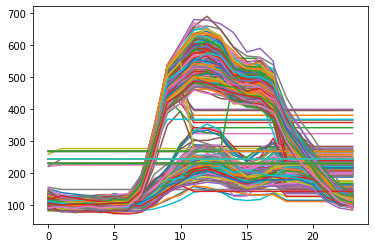

In [35]:
visual_daily_trend(10, 360)

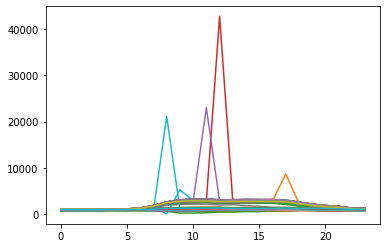

In [36]:
visual_daily_trend(11, 360)

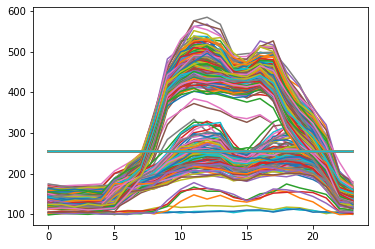

In [37]:
visual_daily_trend(12, 360)

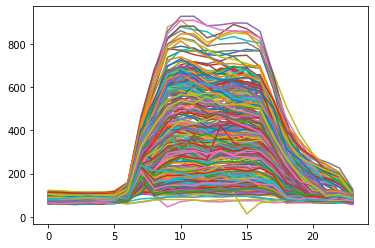

In [38]:
visual_daily_trend(13, 360)

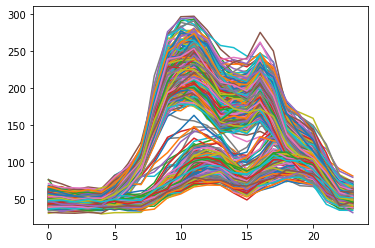

In [39]:
visual_daily_trend(14, 360)

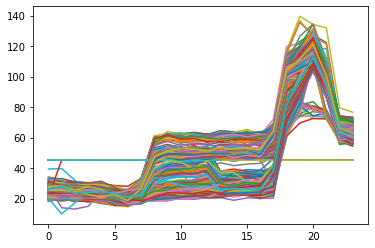

In [40]:
visual_daily_trend(15, 360)

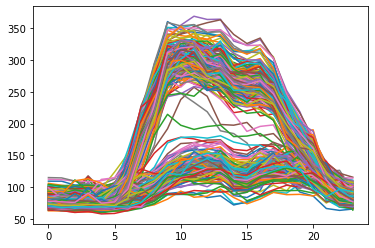

In [41]:
visual_daily_trend(16, 360)

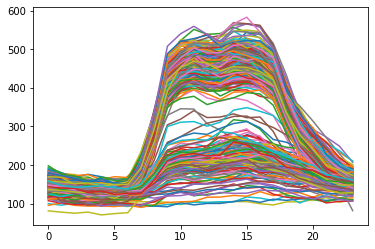

In [42]:
visual_daily_trend(17, 360)

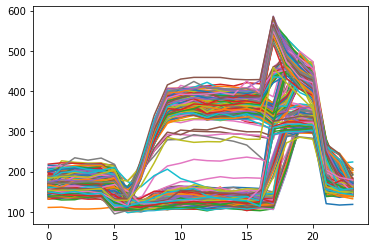

In [43]:
visual_daily_trend(18, 360)

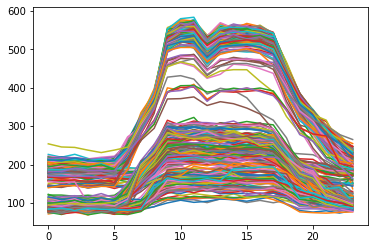

In [44]:
visual_daily_trend(19, 360)

In [45]:
def visual_daily_trend_w(building, days):
    df = pd.read_csv("all_buildings.csv")
    bd = df[df["BuildingID"] == building]
    for i in range(days):
        plt.plot(bd["Record_W"][i*24:(i+1)*24].values)

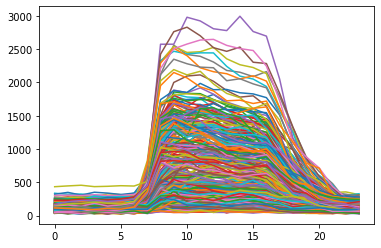

In [46]:
visual_daily_trend_w(0, 365)

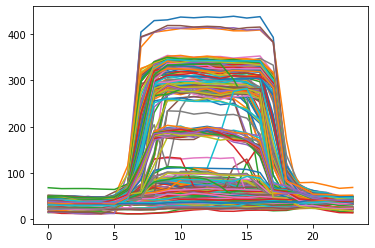

In [47]:
visual_daily_trend_w(1, 365)

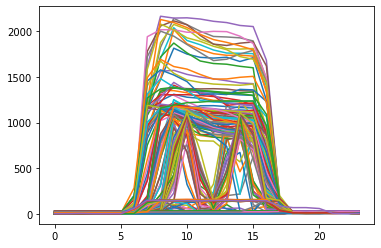

In [48]:
visual_daily_trend_w(2, 365)

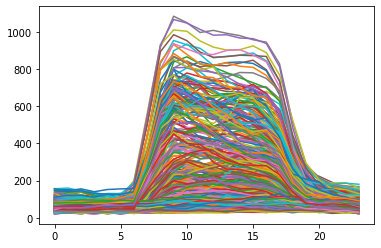

In [49]:
visual_daily_trend_w(3, 365)

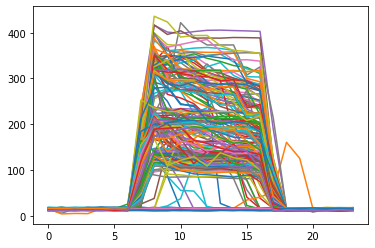

In [50]:
visual_daily_trend_w(4, 365)

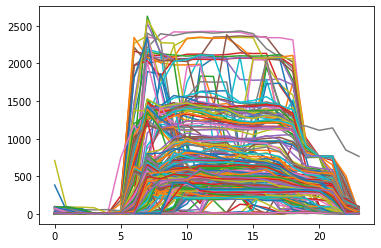

In [51]:
visual_daily_trend_w(5, 365)

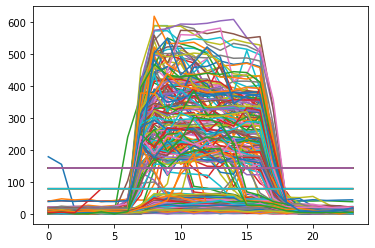

In [52]:
visual_daily_trend_w(6, 365)

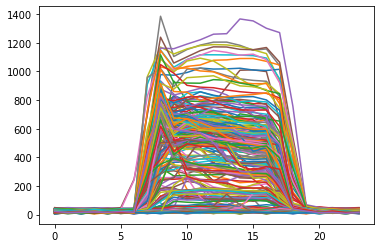

In [53]:
visual_daily_trend_w(7, 365)

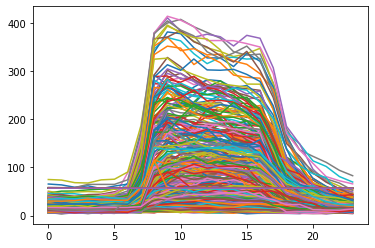

In [54]:
visual_daily_trend_w(8, 365)

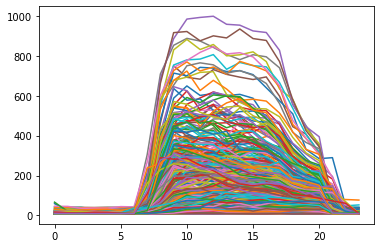

In [55]:
visual_daily_trend_w(9, 365)

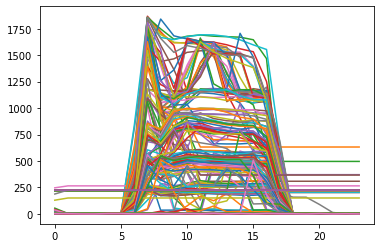

In [56]:
visual_daily_trend_w(10, 365)

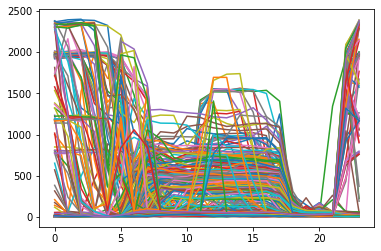

In [57]:
visual_daily_trend_w(11, 365)

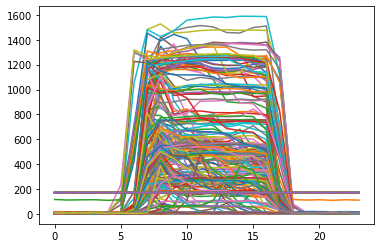

In [58]:
visual_daily_trend_w(12, 365)

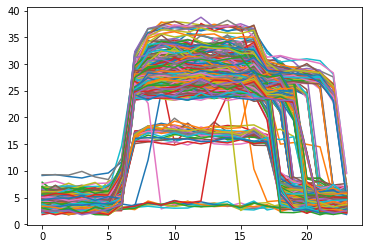

In [59]:
visual_daily_trend_w(13, 365)

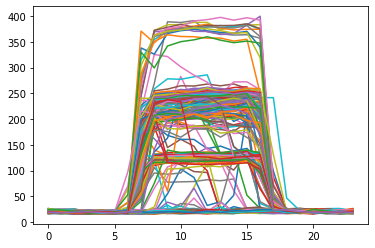

In [60]:
visual_daily_trend_w(14, 365)

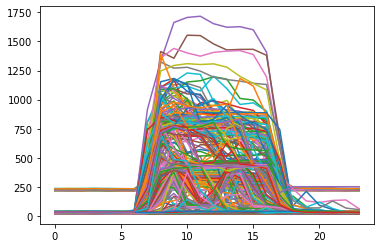

In [61]:
visual_daily_trend_w(15, 365)

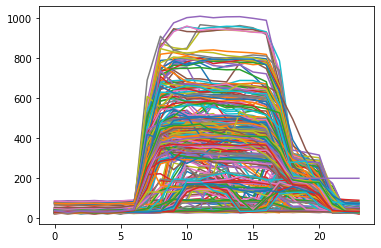

In [62]:
visual_daily_trend_w(16, 365)

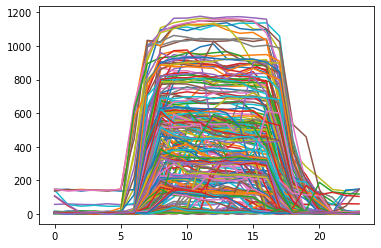

In [63]:
visual_daily_trend_w(17, 365)

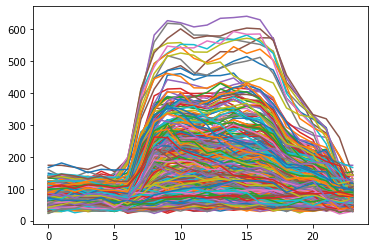

In [64]:
visual_daily_trend_w(18, 365)

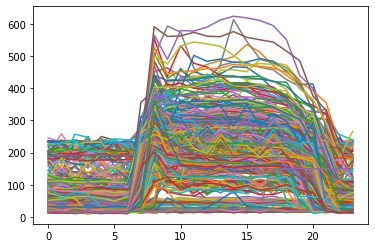

In [65]:
visual_daily_trend_w(19, 365)